In [1]:
%matplotlib inline

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

#Ridge回帰を試して、過学習を実際に体験してみる

#データ生成
train_size = 20
test_size = 12

#一様分布からランダム
X_train = np.random.uniform(low=0,high=1.2,size=train_size)
X_test = np.random.uniform(low=0.1,high=1.3,size=test_size)

#sin(2pi*x)+正規分布からランダム値
y_train = np.sin(X_train * 2 * np.pi) + np.random.normal(0,0.2,train_size)
y_test = np.sin(X_test * 2 * np.pi) + np.random.normal(0,0.2,test_size)

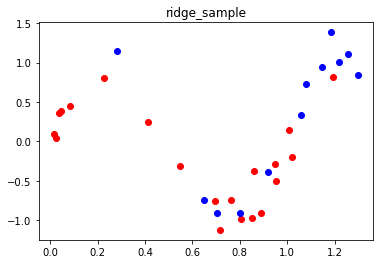

In [28]:
#散布図を描く
fig, ax = plt.subplots()
ax.set_title("ridge_sample")
ax.scatter(X_train,y_train,color="red",label="train")
ax.scatter(X_test,y_test,color="blue",label="test")

alpha:0.000000 MSE(train):0.025607 MSE(pred):0.106011
alpha:0.100000 MSE(train):0.091568 MSE(pred):0.486605
alpha:1.000000 MSE(train):0.121127 MSE(pred):0.385732
alpha:10.000000 MSE(train):0.267477 MSE(pred):0.722869


(0.0, 1.2)

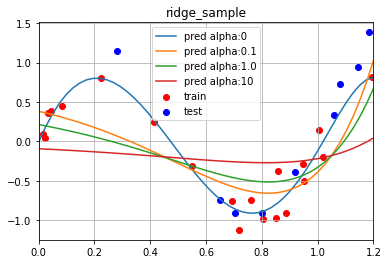

In [29]:
#6次式作成
poly = PolynomialFeatures(6)
#x^6,x^5,....x^0の計算を実施
X_train_poly = poly.fit_transform(X_train.reshape(train_size,1))
X_test_poly = poly.fit_transform(X_test.reshape(test_size,1))

#これしないと何故かグラフ出ない？
fig, ax = plt.subplots()
ax.set_title("ridge_sample")
ax.scatter(X_train,y_train,color="red",label="train")
ax.scatter(X_test,y_test,color="blue",label="test")
#回帰直線を描く用のx値
graph_x = np.linspace(0,1.2)

#Ridge回帰のハイパーパラメータα
alphas = [0,0.1,1.0,10]
for al in alphas:
    #モデル作成
    model = Ridge(alpha=al)
    model.fit(X_train_poly,y_train)
    #MSE(平均二乗誤差)を出力
    y_train_pred = model.predict(X_train_poly) #学習データ
    y_test_pred = model.predict(X_test_poly) #検証データ
    mse_train = mean_squared_error(y_train_pred,y_train)
    mse_test = mean_squared_error(y_test_pred,y_test)
    print("alpha:%f MSE(train):%f MSE(pred):%f" % (al,mse_train,mse_test))
    
    #グラフ描画
    X_graph_poly = poly.fit_transform(graph_x.reshape(graph_x.size,1))
    y_pred_graph = model.predict(X_graph_poly)
    labelStr = "pred alpha:" + str(al)
    ax.plot(graph_x,y_pred_graph,label=labelStr)

ax.grid()
ax.legend()
ax.set_xlim([0,1.2])